# Wstęp do analizy opisowej

## Zadanie 1

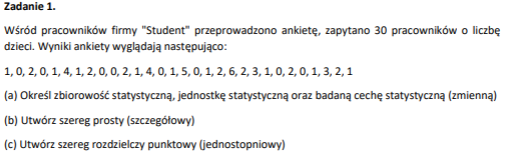

In [ ]:
wyniki = [1,0,2,0,1,4,1,2,0,0,2,1,4,0,1,5,0,1,2,6,2,3,1,0,2,0,1,3,2,1]

# (a) -> jest to próbka populacji, jednostką statystczną jest pracownik
# a cechą badaną jest ilość posiadanych dzieci

# (b) -> szereg prosty(szczegółowy) to taki który jest uporządkowany
# wartościami rosnąco lub malejąco

szereg_szczegolowy = sorted(wyniki)
print(szereg_szczegolowy)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 6]


In [15]:
# (c)
import pandas as pd

#Liczba wystepowań nx
czestosc = {i : wyniki.count(i) for i in sorted(set(wyniki))}

#Procentowy udzial fx = nx/n
udzial_wzgledny = {i: round(wyniki.count(i) / len(wyniki) * 100,2) for i in sorted(set(wyniki))}

#Czestosc skumulowana Nx
aktualna_czestosc = 0
czestosc_skumulowana = {}
for i in czestosc.keys():
    aktualna_czestosc += czestosc[i]
    czestosc_skumulowana[i] = aktualna_czestosc

#Udzial skumulowany 
udzial_skumulowany = {i: round(czestosc_skumulowana[i] / len(wyniki) * 100,2) for i in sorted(set(wyniki))}

szereg_rozdzielczy = pd.DataFrame({
    'liczba dzieci': sorted(czestosc.keys()),
    'czestosc': [czestosc[i] for i in sorted(czestosc.keys())],
    'udzial wzgledny (%)': [udzial_wzgledny[i] for i in sorted(czestosc.keys())],
    'czestosc skumulowana': [czestosc_skumulowana[i] for i in sorted(czestosc.keys())],
    'udzial skumulowany (%)': [udzial_skumulowany[i] for i in sorted(czestosc.keys())]
})

szereg_rozdzielczy.set_index("liczba dzieci",inplace=True)
szereg_rozdzielczy


,czestosc,udzial wzgledny (%),czestosc skumulowana,udzial skumulowany (%)
liczba dzieci,,,,
0,8,26.67,8,26.67
1,9,30.00,17,56.67
2,7,23.33,24,80.00
3,2,6.67,26,86.67
4,2,6.67,28,93.33
5,1,3.33,29,96.67
6,1,3.33,30,100.00


## Zadanie 2

## Zadanie 3

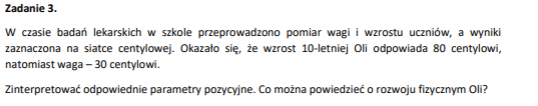

In [17]:
# wydaje mi się że jest lekko niedorzywiona z reguły osoby większe ważą więcej a ona jest wyższa
# i waży poniżej średniej

## Zadanie 4

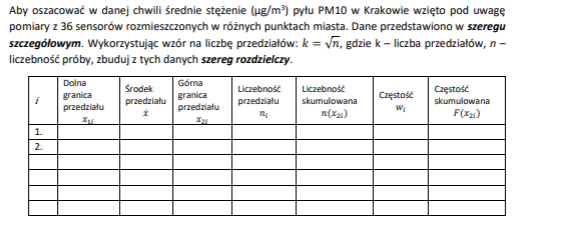

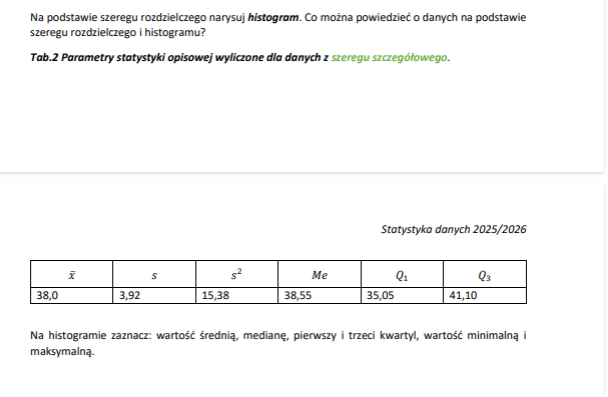

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
szereg_szczegolowy: list[float] = [27.0,30.4,31.9,33.5,34.0,34.4,34.6,35.0,35.1,34.3,36.1,36.2,36.8,37.6,37.9,38.2,38.4,38.7,38.8,39.4,39.8,30.1,40.2,40.6,40.8,41.1,41.1,41.3,41.4,41.5,42.7,42.8,43.3,43.5,44.4]

#liczebnos próby n
n = len(szereg_szczegolowy)
#liczba przedzialow k = sqrt(n)
k = int(np.ceil(np.sqrt(n)))
print(f"Zbiór {n} elementowy, podzielony na k={k} podziałów")

Zbiór 35 elementowy, podzielony na k=6 podziałów


In [36]:
dolna_granica = min(szereg_szczegolowy)
gorna_granica = max(szereg_szczegolowy)

print(f"Dolna granica: {dolna_granica} | Górna granica: {gorna_granica}")

Dolna granica: 27.0 | Górna granica: 44.4


In [49]:
przedzialy = np.linspace(dolna_granica,gorna_granica,k+1)

kategorie = pd.cut(szereg_szczegolowy,bins=przedzialy,include_lowest=True,right=True)

liczebnosci = kategorie.value_counts().sort_index()

print("Przedzialy:")
print(przedzialy)
print("\nLiczebności w przedziałach:")
print(liczebnosci)

Przedzialy:
[27.  29.9 32.8 35.7 38.6 41.5 44.4]

Liczebności w przedziałach:
(26.999, 29.9]     1
(29.9, 32.8]       3
(32.8, 35.7]       7
(35.7, 38.6]       7
(38.6, 41.5]      12
(41.5, 44.4]       5
Name: count, dtype: int64


In [54]:
kategorie.categories[0].left

26.999

In [68]:
aktualna_liczbnosc = 0
liczebnosci_skumulowane = {}
for i in range(len(przedzialy) - 1):
    aktualna_liczbnosc += liczebnosci.values[i]
    liczebnosci_skumulowane[i] = aktualna_liczbnosc

In [71]:
szereg_rozdzielczy = pd.DataFrame({
    'Dolna granica przedzialu': [kategorie.categories[i].left for i in range(len(przedzialy) -1 )],
    'Srodek przedzialu': [(kategorie.categories[i].left + kategorie.categories[i].right) / 2 for i in range(len(przedzialy) - 1)],
    'Gorna granica przedzialu': [kategorie.categories[i].right for i in range(len(przedzialy) - 1)],
    'Liczebnosc przedzialu': [liczebnosci.values[i] for i in range(len(przedzialy) - 1)],
    'Liczebnosc skumulowana': [liczebnosci_skumulowane[i] for i in range(len(przedzialy) - 1)],
    'Czestosc': [round(liczebnosci.values[i] / len(szereg_szczegolowy) * 100,2) for i in range(len(przedzialy) - 1)],
    'Czestosc skumulowana': [round(liczebnosci_skumulowane[i] / len(szereg_szczegolowy) * 100,2) for i in range(len(przedzialy) - 1)]
})

szereg_rozdzielczy

,Dolna granica przedzialu,Srodek przedzialu,Gorna granica przedzialu,Liczebnosc przedzialu,Liczebnosc skumulowana,Czestosc,Czestosc skumulowana
0,26.999,28.4495,29.9,1,1,2.86,2.86
1,29.900,31.3500,32.8,3,4,8.57,11.43
2,32.800,34.2500,35.7,7,11,20.00,31.43
3,35.700,37.1500,38.6,7,18,20.00,51.43
4,38.600,40.0500,41.5,12,30,34.29,85.71
5,41.500,42.9500,44.4,5,35,14.29,100.00


In [58]:
for i in range(len(przedzialy)):
    print(i)

0
1
2
3
4
5
6


In [59]:
przedzialy

array([27. , 29.9, 32.8, 35.7, 38.6, 41.5, 44.4])

In [63]:
liczebnosci

(26.999, 29.9]     1
(29.9, 32.8]       3
(32.8, 35.7]       7
(35.7, 38.6]       7
(38.6, 41.5]      12
(41.5, 44.4]       5
Name: count, dtype: int64

In [66]:
liczebnosci.values

array([ 1,  3,  7,  7, 12,  5], dtype=int64)

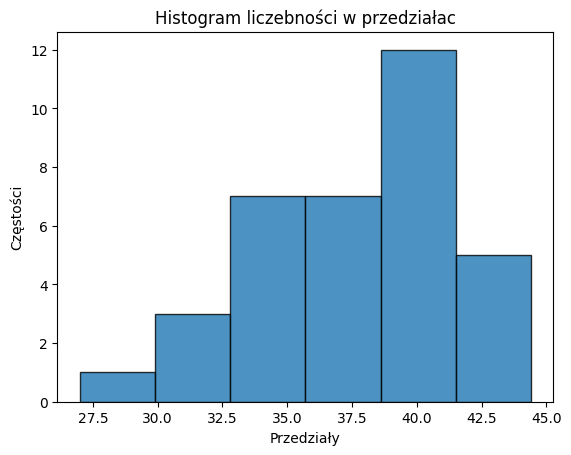

In [105]:
# Pozycje początkowe słupków
pozycje = przedzialy[:-1]

# Szerokości słupków
szerokosci = np.diff(przedzialy)

# Rysowanie słupków
plt.bar(pozycje, liczebnosci, width=szerokosci, align='edge', edgecolor='black', alpha=0.8)
plt.xlabel('Przedziały')
plt.ylabel("Częstości")
plt.title("Histogram liczebności w przedziałac")
plt.show()